# Basic machine learning methods $-$ sklearn

This notebook will provide some basic explanations and examples of some simple machine learning methods using the sklearn toolkit. This is essentially an aggregation of the course material from Applied Machine Learning in Python, on Coursera, but more clear, comprehensive, and readable, for my own reference in the future.

Below are some imports required for each case. This cell should be run before proceeding, regardless of which method you're reviewing.

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib notebook

### Note: cross-validation and other evaluation methods will be covered in another notebook!

# K-Nearest Neighbors

K-nearest neighbors can be used for classification or regression. In short, it memorizes the training data. When faced with a new test data point, it finds the closest k points in the training set and chooses a classifcation/value by majority vote or averaging. This method is largely good as a baseline against which one may compare mode sophisticated models.

__Key parameters:__
* Model complexity: __n_neighbors__, default = 5. This determines the number of training points that the classifier/regressor will include in the majority vote/averaging.<br><br>

* Model fitting: distance metric $-$ __distance function__ between points, default = Euclidean.

## Classification

### Read and scale data $-$ Fruits

This data set contains a few measurements taken on a variety of fruits and associates them with a specific fruit type, i.e., apple or mandarin. It also contains a color_score, indicating in an abstract way what color each fruit was.

In [87]:
# Read in data - using the fruits data set provided in the Coursera course
fruits = pd.read_table('data\\fruit_data_with_colors.txt')

# Grab the X and y data from the table
X_fruits = fruits.loc[:, 'mass':'color_score']
y_fruits = fruits['fruit_label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits)

# Show data head
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Scale the data based on the range of the initial, unscaled data. This will convert each entry into a value between 0 and 1, with 0 being the original minimum and 1 being the original maximum.

In [40]:
# Scale X values
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler on the training set, transform both train and test data using
# same scaler. Ignore conversion from int to float by scaler.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\jsharmon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Fit and score model

Import and fit the model. KNN benefits greatly from scaling the feature data; this will be demonstrated using the accuracy values, hence the fitting of two models.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Generate instance and fit model using k = 5, with the unscaled data
knn_unscaled = KNeighborsClassifier(n_neighbors = 5)
knn_unscaled.fit(X_train, y_train)

# Do the same using scaled data - illustrate importance of scaling
knn_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_scaled.fit(X_train_scaled, y_train);

Data scaling is performed using a MinMax scaler.

In [34]:
# Score the model, unscaled data
unscaled_train_score = knn_unscaled.score(X_train, y_train)
unscaled_test_score = knn_unscaled.score(X_test, y_test)

# Score the model, scaled data
scaled_train_score = knn_scaled.score(X_train_scaled, y_train)
scaled_test_score = knn_scaled.score(X_test_scaled, y_test)

The accuracy is determined using `model.score(X_test, y_test)`. The output is formatted for clarity.

In [41]:
# Print results, without scaling
print('Accuracy on unscaled training set: {:.2f}'
     .format(unscaled_train_score))
print('Accuracy on unscaled test set: {:.2f}'
     .format(unscaled_test_score))

# Newline to separate output from different models
print()

# Print results, with scaling
print('Accuracy on scaled training set: {:.2f}'
     .format(scaled_train_score))
print('Accuracy on scaled test set: {:.2f}'
     .format(scaled_test_score))

Accuracy on unscaled training set: 0.70
Accuracy on unscaled test set: 0.53

Accuracy on scaled training set: 0.95
Accuracy on scaled test set: 1.00


## Regression

### Generate example data set

`sklearn` provides tools for generating data sets to practice on for regression. These are the same parameters used to generate the data set in the original Coursera course, albeit without the random_state parameter set.

In [67]:
from sklearn.datasets import make_regression

# Generate data, label it R1 for regression data 1. 
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                             n_informative=1, bias = 150.0,
                             noise = 30, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

### Fit and score model

In [68]:
from sklearn.neighbors import KNeighborsRegressor

# Fit the regressor on the training data
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

# Score the model. Regressors commonly used R^2 values as an indicator of performance.
knn_r2 = knnreg.score(X_test, y_test)

# Print the output, format for clarity.
print('R-squared test score: {:.3f}'.format(knn_r2))

R-squared test score: 0.425


### Plot the data and regressor predictions

<IPython.core.display.Javascript object>


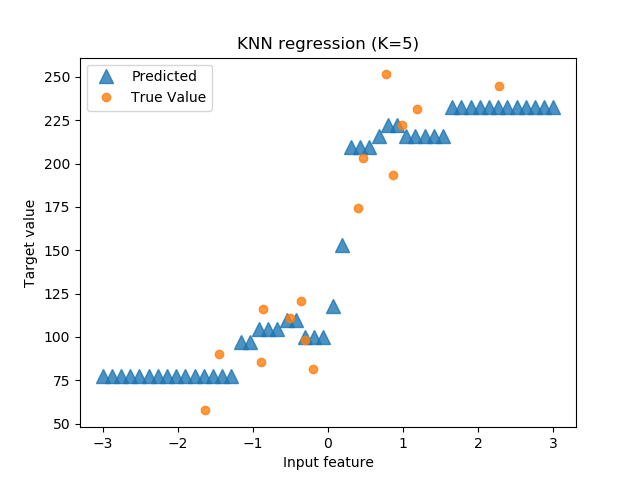

In [76]:
# Generate figure and axes
fig, ax = plt.subplots(1, 1)

# Generate some test input data, reshape data for plotting
X_pred = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

# Generate model with reshaped data, get predicted output
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
y_pred = knnreg.predict(X_pred)

# Generate and label the plot. Code only slightly modified from Coursera.
ax.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
ax.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
ax.set_xlabel('Input feature')
ax.set_ylabel('Target value')
ax.set_title('KNN regression (K=5)')
ax.legend();

# Linear Regression $-$ Least Squares, Ridge, Lasso, Polynomial

Linear regression is a relatively simple method that assumes a linear relationship between the feature and label data. This is a relatively strong assumption, but when true, these regressors can perform reasonably well. Least squares is the most basic method, while Ridge and Lasso regression employ regularization to prevent overfitting. 

Ridge regression uses L2 regularization, meaning it minimizes $W_j^2$; this method has the weights trend towards zero to reduce model complexity. this is best for data sets with a lot of features that have a small to mid size impact.

Lasso regression uses L1 regularization, meaning it minimizes $|W_j|$. This method sets certain weights to zero when the regularization parameter is set high enough; this can be useful for feature selection and the generation of a sparse solution. Lasso regression is useful when one has a data set with a low number of high impact features.

__Key parameters:__
* For Ridge and Lasso, alpha: a higher alpha value indicates stronger regularization and a trend towards decreasing model complexity. Models with a large alpha value are less likely to overfit, but if the value is set too high, the model may be too simple to make accurate predictions.<br><br>

* For Lasso, max_iter: this determines the number of iterations that the model will go through when fitting. Optional.<br><br>

__Pros and Cons of linear models (includes linear kernel SVM, logistic regression):__<br>

_Pros:_
* Simple and easy to train
* Fast prediction
* Scales well to very large data sets
* Works well with sparse data
* Reasons for prediction are relatively easy for a human to interpret<br><br>

_Cons:_
* For lower-dimensional data, other models may generalize better
* For classification, data may not be linearly separable
* For regression, assumes there is a linear relationship between features and output value, unless polynomial regression is used

## Read and lightly clean data $-$ crime data, from Coursera

The following code was taken almost directly from Coursera. The features include population information and the target values are the number of violent crimes per population in a given region.

In [88]:
# Read in crime data set - copied directly from Coursera
# Communities and Crime dataset for regression
# https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

crime = pd.read_table('data\\CommViolPredUnnormalizedData.txt', sep=',', na_values='?')

# Remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
cols = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.iloc[:,cols].dropna()

# Generate feature and target vals
X_crime = crime.iloc[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']

# Show head of data
crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,442.95


## Least squares

### Fit model, score

This method is very simple to implement. It is also easy to grab the weights and bias from; note that any parameters generated by fitting the model end in \_, such as `linreg.intercept_`.

In [108]:
from sklearn.linear_model import LinearRegression

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime)

# Fit the model
linreg = LinearRegression().fit(X_train, y_train)

# Score the model
tr_score = linreg.score(X_train, y_train)
te_score = linreg.score(X_test, y_test)

# Print the output - scoring is done with R^2
print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_), '\n')
print('R-squared score (training): {:.3f}'.format(tr_score))
print('R-squared score (test): {:.3f}'.format(te_score))
print()
print('Note that the R^2 is typically higher for the training set; this may be an indicator of overfitting.')

linear model intercept: -139.73555108578557
linear model coeff:
[ 7.25e-04  1.43e+01  1.24e+01 -3.64e+01  4.37e+00 -1.37e+01 -8.64e-04
  1.13e+00 -1.57e-02 -1.28e+01  2.40e+01 -8.17e+00  7.83e-01  5.38e+00
 -5.62e+00  1.08e-02  1.87e-03  5.77e-04 -1.02e+01 -1.35e+01  3.81e+00
  2.04e+00  2.26e+00  1.01e+01 -3.45e+00  2.23e-01  6.38e+00  4.36e+00
  9.44e+01  1.01e+01  5.38e+01 -1.54e+02 -8.43e+01  1.00e+01 -2.97e+01
  3.09e+00  5.29e-01  3.01e+00 -9.50e+00 -5.76e-03  4.69e+01  3.52e-05
  9.11e-02  1.12e+00  8.61e-01 -5.11e-01  5.90e+01 -3.55e+01 -1.68e+01
 -1.84e+01 -5.42e-01 -2.75e+01  4.93e+01 -7.18e+01 -8.05e+01  6.55e+02
 -4.83e+02 -7.53e+01  3.28e+01  2.74e+00  2.94e+01  2.00e-02 -1.65e+00
  6.97e+01  4.87e+00 -1.64e+00  2.05e+00  4.79e+00  1.46e+01  8.76e-05
 -9.31e-04  3.37e-05 -5.39e-05 -4.63e-01  1.09e-01 -3.23e-01  1.40e-01
  9.21e-01 -5.44e+00  8.77e-01 -3.11e+01  4.74e-02 -7.35e-02  1.86e+01
  1.16e-01  2.85e+00  2.98e-01 -3.02e-01] 

R-squared score (training): 0.655
R-squa

## Ridge regression

### Fit model, score, without feature scaling

This method is similarly simple to implement. The only real difference is that the alpha parameter should be set according to how much regularization the user desires. Note that similar to KNN, feature scaling is important.

In [127]:
from sklearn.linear_model import Ridge

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime)

# Train the model, use alpha = 20
linridge = Ridge(alpha=20.0).fit(X_train, y_train)

# Score the model
tr_score = linridge.score(X_train, y_train)
te_score = linridge.score(X_test, y_test)

# Get nonzero features, for future comparison with Lasso regression
numFe = np.sum(linridge.coef_ != 0)

# Print the output - scoring is done with R^2
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_), '\n')
print('R-squared score (training): {:.3f}'
     .format(tr_score))
print('R-squared score (test): {:.3f}'
     .format(te_score), '\n')
print('Number of non-zero features: {}'
     .format(numFe))
print('\nNote that this indicates overfitting; the train R^2 is far higher than the test R^2.')

ridge regression linear model intercept: -7456.964907383305
ridge regression linear model coeff:
[-2.06e-04  8.16e+00  1.93e+00 -4.02e+01  2.47e+01 -1.87e+01 -8.10e-04
  1.52e+00 -6.28e-03 -7.13e+00  4.40e+00 -7.48e+00  1.54e+01  1.03e+01
 -1.42e+01  3.86e-03 -8.05e-04  4.22e-03 -5.56e+00 -2.07e+01  5.82e+00
  1.19e+00  2.73e+00  1.15e+01 -3.05e+00 -4.60e-01  3.00e+00  8.31e+00
  5.36e+01  6.43e+00 -4.38e+00 -3.92e+01  1.10e+01  1.60e+01 -2.60e+01
  1.90e+00  1.03e+00  4.10e+00 -7.95e+00 -1.55e-03  6.07e+01 -4.55e-04
  3.26e+00 -3.98e+00  8.92e-01  1.14e+00 -2.81e+00 -1.25e+01  1.86e+01
 -2.68e+01 -1.20e-01 -2.48e+01  1.16e+01 -2.37e+01  3.52e+01  4.59e+01
 -6.67e+01 -2.34e+01  2.13e+01  8.51e-01  1.55e+01  1.16e-02 -3.86e+00
  1.84e+01  1.93e+01 -1.68e+00  5.01e+00  6.35e+00 -8.18e-01 -9.10e-04
  1.50e-03 -9.85e-04 -7.67e-05 -4.66e-01 -3.12e-01 -3.75e-01  9.16e-02
  1.09e+00 -4.90e-01 -1.60e+00 -2.92e+01  1.90e-01  3.27e-01  2.23e+01
  6.80e-01  4.33e+00  1.65e+00 -4.03e+00] 

R-squar

### Fit model, score, with feature scaling

Feature scaling improves the performance of the model.

In [125]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

# Create scaler to fit later
scaler = MinMaxScaler()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime)

# Scale the data - note that scaler is fit on training data, same scaler is used on
# test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model with scaled data
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

# Score the model
tr_score = linridge.score(X_train_scaled, y_train)
te_score = linridge.score(X_test_scaled, y_test)

# Get nonzero features, for future comparison with Lasso regression
numFe = np.sum(linridge.coef_ != 0)

# Print the output - scoring is done with R^2
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_), '\n')
print('R-squared score (training): {:.3f}'
     .format(tr_score))
print('R-squared score (test): {:.3f}'
     .format(te_score), '\n')
print('Number of non-zero features: {}'
     .format(numFe))
print('\nNot only are the train and test R^2 scores much closer, indicating less overfitting, the test R^2 score is\n',
      'higher overall, indicating that scaling the data produces a model with better predictive power.')

ridge regression linear model intercept: 941.3653811988315
ridge regression linear model coeff:
[ 7.24e+01  2.46e+01 -4.96e+01 -1.03e+02 -8.42e+01  2.40e+01  7.14e+01
  1.47e+02  1.35e+01 -6.93e+01 -4.72e+01 -2.02e+02  1.45e+01  1.70e+02
 -9.32e+01 -1.30e+00  2.68e+01  6.17e+01  4.30e+01 -6.14e+01  7.79e+01
  8.53e+00  2.43e+01 -2.99e+01 -1.01e+02 -1.29e+01 -1.06e+01  4.14e+01
  1.70e+02  1.10e+02  6.44e+01  1.23e+02  1.02e+02 -3.54e+02 -4.57e+02
 -3.11e+02 -2.72e+02  5.64e+01 -5.88e+01  7.80e+01  5.49e+02  3.37e+01
  3.05e+01 -1.22e+01  1.82e+01  6.57e+01  4.33e+00  6.03e+00  3.05e+01
  4.67e+01  7.71e+01 -5.67e+01  1.26e+02  7.11e+01  4.56e+01 -4.53e+00
  6.51e+01 -5.57e+01  1.00e+02  3.50e+01  8.62e+01  1.44e+02 -9.84e+01
 -3.16e+00  2.57e+02  3.25e+01  1.08e+02  1.20e+02  1.72e+01 -5.24e-01
  1.72e+01  3.09e+01  4.40e+01 -7.07e+01  1.48e+00  3.41e+01  1.14e+02
  7.18e+01  6.88e+01  2.74e+01 -5.71e+01  1.74e+02  8.94e+01  6.93e+01
 -7.59e+01  7.48e+01  9.09e+01 -2.44e+01] 

R-square

C:\Users\jsharmon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Lasso regression

### Fit model, score, with feature scaling

Using this model is very similar to using Ridge regression; the main difference is in how it actually works. While Ridge regression will attempt to have weights trend towards zero, Lasso regression will actually set weights to zero, resulting in a sparse model depending on how high the regularization parameter alpha is set. Again, data scaling is important when using this method. The code below is almost directly copied from Coursera.

In [131]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

# Create a scaler to fit later
scaler = MinMaxScaler()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime)

# Scale the data; note that the scaler is fit on the training data, and the same
# scaler is applied to the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generate and fit the model
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

# Print the results, including the most relevant features
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_),'\n')
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)),'\n')
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 1154.9392163416087
lasso regression linear model coeff:
[ 0.00e+00  0.00e+00 -0.00e+00 -4.68e+01 -2.61e+01  0.00e+00  0.00e+00
  1.21e+02  0.00e+00 -0.00e+00  0.00e+00 -2.69e+02 -0.00e+00  0.00e+00
 -0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -0.00e+00  0.00e+00
  0.00e+00 -0.00e+00  0.00e+00 -1.25e+02 -0.00e+00 -0.00e+00  0.00e+00
  2.78e+02 -0.00e+00  0.00e+00  0.00e+00  0.00e+00 -0.00e+00 -1.03e+03
 -0.00e+00 -0.00e+00 -0.00e+00 -1.65e+02  0.00e+00  1.52e+03  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  5.12e-01  0.00e+00  0.00e+00  0.00e+00
  0.00e+00 -0.00e+00  0.00e+00  6.23e+01  0.00e+00  0.00e+00  0.00e+00
  0.00e+00 -0.00e+00  0.00e+00  0.00e+00 -0.00e+00  0.00e+00 -1.46e+02
  0.00e+00  1.10e+02  0.00e+00  9.39e+01  3.30e+01  0.00e+00  0.00e+00
  0.00e+00  8.82e+01  0.00e+00 -0.00e+00  0.00e+00  0.00e+00  3.55e+01
  0.00e+00 -0.00e+00  0.00e+00 -1.57e+02  0.00e+00  0.00e+00  1.97e+02
 -1.94e+01  0.00e+00  3.98e+01 -0.00e+00] 

Non-zer

C:\Users\jsharmon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Polynomial regression

### Generate data for polynomial regression

In [136]:
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7)

### Fit model, score, with polynomial feature transform

Polynomial regression is a special case of linear regression in which the features are transformed according to which degree polynomial will be fit to the data. For example, instead of maintaining only X, the data can be transformed to include new features that represent data up to X^2. A linear model is then trained on these transformed features to generate a polynomial model. This code is largely pulled from Coursera.

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Transform the features to allow fitting polynomials; can use .fit_transform to do this in
# one function.
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

# Splitthe transformed data
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1)

# Fit a simple least squares model on the transformed data
linreg = LinearRegression().fit(X_train, y_train)

# Print results
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('linear model coeff (w):\n{}'.format(linreg.coef_),'\n')
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))

# Information about reguarization with polynomial regression
print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

# Fit a polynomial Ridge regression model
linreg = Ridge().fit(X_train, y_train)

# Print results
print('(ridge) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(ridge) linear model coeff (w):\n{}'.format(linreg.coef_),'\n')
print('(ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(ridge) R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

print('\nResults are dependent on the data split, but the difference between train R^2 and test R^2',
      '\nis generally smaller with Ridge regression.')

linear model intercept (b): 677590044827179.625
linear model coeff (w):
[-6.78e+14  5.78e+01 -1.12e+01 -4.09e+00  2.86e+01  4.33e+00 -3.56e+01
 -2.61e+01 -4.60e+01  3.68e+00  3.35e+00 -1.91e+01 -3.48e+00  3.62e+00
  9.43e+00  5.21e+00 -2.27e+01  5.37e+00  1.89e+00  2.35e+01  1.14e+01
  2.95e+01  6.89e+00 -1.27e+01 -2.36e+01 -2.91e+00 -7.92e+00 -7.20e+00
  2.73e+00 -2.50e+00 -5.19e+00  1.37e+01  1.19e+01  2.45e+01 -3.36e+00
  1.30e+01] 

R-squared score (training): 0.411
R-squared score (test): -1.258


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(ridge) linear model intercept (b): 6.704
(ridge) linear model coeff (w):
[ 0.    2.24  4.22 -3.14  2.81 -0.08 -1.61 -0.19 -2.07 -0.17  0.64  4.11
 -0.21  1.97  3.3  -1.28 -0.32  2.37  1.06  1.58  1.9   4.4   0.13 -0.61
 -1.53 -0.86  2.66  1.8   0.26  0.89  2.08  1.75  0.37 -0.43 -1.66 -1.07] 

(ridg

# Logistic regression, binary classification

Logistic regression is a common linear method for binary classification. It is easy to implement and has an option for regularization in its C parameter. A higher value of C provides less regularization.

### Generate data for binary classification

In [178]:
# Read in data - using the fruits data set provided in the Coursera course
fruits = pd.read_table('data\\fruit_data_with_colors.txt')

# Grab the X and y data from the table
X_fruits = fruits.loc[:, 'mass':'color_score']
y_fruits = fruits['fruit_label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits)

# Set apples to 1, all other fruits to 0
y_fruits_apple = y_fruits == 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_fruits.values, y_fruits_apple.values)

# Show data head
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Fit and score the model

In [186]:
from sklearn.linear_model import LogisticRegression

# Fit the model with regularization parameter C = 100; higher C gives less
# regularization!
clf = LogisticRegression(C=100, solver='lbfgs').fit(X_train, y_train)

# Score and print results
print('Training set accuracy: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Test set accuracy: {:.2f}'
     .format(clf.score(X_test, y_test)))

Training set accuracy: 0.84
Test set accuracy: 0.80


# Support vector machines

SVMs are trained or fit based on how much separation between the two classes they can provide, called the "classifier margin". This method tries to maximize this classifier margin. 

This method can be either linear or nonlinear, depending on the kernel chosen. The default is a radial basis function. This is another example of a method that benefits from feature scaling. Similar to logistic regression, SVMs also have a regularization parameter C; increasing C indicates less regularization. Large C essentially tells the model to care less about maximizing the margin and to instead focus on avoiding misclassification of training points (leading to a more complex model). Smaller C, on the other hand, prioritizes maximizing the classifier margin.

Kernelized SVMs effective involve transforming the data, fitting like usual to separate the data, and then transforming back to the original dimensions/plane. In short, these generate hyperplanes to separate the data in higher dimensional space.

Another regularization parameter exists: gamma. This influences the width of the similarity function, or basically how wide of an influence each point has on fitting the SVM. A small gamma will generate a wider similarity function, causing more points to be grouped together, which generates smoother decision boundaries, i.e., a less complex model. Thus, increasing gamma increases model complexity and the chance of overfitting.

Both C and gamma should be tuned together when generating and optimizing models.

Additionally, it should be noted that scaling the data is important for SVMs with nonlinear kernels.

__Key parameters:__
* Gamma: gamma controls the width of the similarity function. Decreasing gamma increases regularization (reduces chance of overfitting) and vice versa. See above for more details.<br><br>

* C: C tells the SVM how much to prioritize a large classifier margin as compared to avoiding misclassifying points in the training set. A lower C prioritizes maximizing the margin and reduces the chance of overfitting (low C = more regularization).<br><br>

__Pros and Cons (kernelized, linear is explained with regression):__<br>

_Pros:_
* Can perform well on a range of data sets
* Versatile: different kernel functions can be specified, or custom kernels can be defined for specific data types
* Works well for both low and high dimensional data

_Cons:_
* Efficiency (runtime speed and memory usage) decreases as training set size increases (e.g., over 50,000 samples)
* Needs careful normalization of input data and parameter tuning
* Does not provide direct probability estimates (but could be estimated using e.g., Platt scaling)
* Difficult to interpret why a decision was made

### Generate and scale data

In [199]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

# Generate scaler to fit later
scaler = MinMaxScaler()

# Generate blob data
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3)
y_D2 = y_D2 % 2

# Fit scaler, transform data; fit on train data, apply same scaler to train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fit and score model

In [203]:
from sklearn.svm import SVC

# Fit the model using default radial basis function (RBF) kernel
clf = SVC(gamma='auto').fit(X_train, y_train)

# Print output
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)), '\n')

# Fit with poly kernel instead of RBF
clf = SVC(kernel='poly', degree=3, gamma='auto').fit(X_train, y_train)

# Print output
print('Accuracy of poly SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of poly SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RBF-kernel SVC on training set: 0.64
Accuracy of RBF-kernel SVC on test set: 0.52 

Accuracy of poly SVC on training set: 0.57
Accuracy of poly SVC on test set: 0.40


# Decision trees

Description

Pros and Cons

### Generate data